# Hotel Booking Cancellation Prediction System

# 1. Data Pre-processing (30%)

In [247]:
import pandas as pd

We need to import the Pandas library.

In [248]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/hotel_bookings.csv')

We now need to read the csv file.

In [249]:
completedata_df = df

Here we are just throwing everything from df into our new dataframe. It makes it easier to work with.

### Gain a comprehensive understanding of the dataset through summarisation and basic data checks. At minimum, you should examine data types and identify missing values.

In [250]:
completedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We need to identify the different datatypes within our dataset.

In [251]:
completedata_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Here is a statistical summary of our dataset.

In [252]:
completedata_df.shape

(119390, 32)

Its useful to know how large our dataset is by examining how many rows and columns it has.

In [253]:
completedata_df.drop(columns=['reservation_status_date'], inplace=True)

Now we are going to drop the columns that are not needed. Now we need to do the same for the rest of the columns.

In [254]:
completedata_df.drop(columns=['reservation_status'], inplace=True)
completedata_df.drop(columns=['assigned_room_type'], inplace=True)
completedata_df.drop(columns=['arrival_date_day_of_month'], inplace=True)
completedata_df.drop(columns=['arrival_date_week_number'], inplace=True)
completedata_df.drop(columns=['arrival_date_year'], inplace=True)
completedata_df.drop(columns=['days_in_waiting_list'], inplace=True)
completedata_df.drop(columns=['company'], inplace=True)
completedata_df.drop(columns=['agent'], inplace=True)
completedata_df.drop(columns=['adr'], inplace=True)

In [255]:
completedata_df.shape

(119390, 22)

Here we can see that the columns have been dropped successfully, as now we are 10 columns less.

In [256]:
completedata_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,Direct,0,0,0,C,3,No Deposit,Transient,0,0
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,Direct,0,0,0,C,4,No Deposit,Transient,0,0
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,Direct,0,0,0,A,0,No Deposit,Transient,0,0
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,Corporate,0,0,0,A,0,No Deposit,Transient,0,0
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,TA/TO,0,0,0,A,0,No Deposit,Transient,0,1


This also shows that we have done has worked.

In [257]:
completedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

Lets see if they have been dropped sucessfully.

### Employ suitable techniques to address missing or inconsistent values, with clear justifications for your choices.

In [258]:
completedata_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
booking_changes                     0
deposit_type                        0
customer_type                       0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

In [259]:
completedata_df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
booking_changes                     0
deposit_type                        0
customer_type                       0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

Here we can see how many missing values there are in each category in our dataset.

In [260]:
# Remove rows from data frame where "country" values are missing.

completedata_df.dropna(subset = ["country"], inplace=True)

We can either replace the missing values with some other values, or we can remove them completely from the dataset. I think that removing is missing values is good because it means that the data set is less likely to be biased compared to filling in these missing values with assumed values which proposes bias.

Here we are going to remove the missing values in the "country" category.




In [261]:
completedata_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

Here we can see we have removed the missing values from the category.

Lets do the same for the rest of the columns.

In [262]:
completedata_df.dropna(subset = ["children"], inplace=True)

In [263]:
completedata_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

Now our data has no missing values, and is clean.

### Extract valuable insights from the dataset that could benefit hotel management, including the following at minimum:

•	Calculating cancellation percentages for City and Resort hotels.



In [264]:
# I had a search around on Google,
# and the groupby() method allows us to group and entire category of data.

grouped = completedata_df.groupby('hotel')

Here we are grouping all the contents of the 'hotel' category.

In [265]:
total = grouped['is_canceled'].count()
print(total)

hotel
City Hotel      79302
Resort Hotel    39596
Name: is_canceled, dtype: int64


Now we can see the total bookings for both the city hotels, and the resort hotels.

In [266]:
canceled = grouped['is_canceled'].sum()
print(canceled)

hotel
City Hotel      33076
Resort Hotel    11077
Name: is_canceled, dtype: int64


We now need to calculate ONLY the amount of cancellations for each of the hotel groups.

In [267]:
canceled_percen = (canceled / total) * 100
print(canceled_percen)

hotel
City Hotel      41.708910
Resort Hotel    27.975048
Name: is_canceled, dtype: float64


Now we can do a bit of maths, and calcukate the overall cancellations for both groups, as a percentage.

Time for the next bit!

•	Identifying the most frequently ordered meal types.

In [268]:
meals = completedata_df['meal']

Lets select the 'meal' category.

In [269]:
meal_counts = meals.value_counts()

In [270]:
print(meals.unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


Lets get the unique rows in the set of data, so that when we do print out the meal count, we don't get all the repeats.



In [271]:
print(meal_counts.head())

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64


In [272]:
print(meals.mode())

0    BB
Name: meal, dtype: object


Now we print the unique rows out, and here we can see that BB is the most frequently ordered meal.

Time for the next bit (its pretty much the same as we did before, so it'll be pretty straight forward to do)!

•	Determining the number of returning guests.

In [273]:
guests = completedata_df[['adults', 'children', 'babies']]

We need to select all of the neccesary categories, and the total will be stored in guests.

In [274]:
returning_guests = completedata_df['is_repeated_guest']

Here we are selecting the contents of 'is_repeated_guest', and storing it in returning_guests.

In [275]:
total_returning = returning_guests.sum()

Now we calculate the total of the returning guests.

In [276]:
print(total_returning)

3806


Here is the total number of returning guests.

Time for the next bit (this bit is straight forward, we just need to do what we did with the meal_counts bit)!

•	Finding the most booked room types.

In [277]:
room_types = completedata_df['hotel']

We need to select everything from hotel and store it in room types. In hotel we have city hotel, and resort hotel, and that's why we don't need to specify them individually.

In [278]:
room_counts = room_types.value_counts()

Now we identify the unique values which, in this case, there is two unique values which are resort hotel and city hotel, and store in room counts, which then enables us to calculate find out the most booked rooms.

In [279]:
print(room_counts.head())

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64


Here we are now printing out the entirety of room count, which we can now see that result hotel is the most booked hotel.

Time for the next bit!

•	Exploring correlations between room types and cancellations.

In [280]:
completedata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_month              118898 non-null  object 
 4   stays_in_weekend_nights         118898 non-null  int64  
 5   stays_in_week_nights            118898 non-null  int64  
 6   adults                          118898 non-null  int64  
 7   children                        118898 non-null  float64
 8   babies                          118898 non-null  int64  
 9   meal                            118898 non-null  object 
 10  country                         118898 non-null  object 
 11  market_segment                  118898 non-null  object 
 12  distribution_cha

In [281]:
correlation_df = completedata_df[['hotel', 'previous_cancellations']]

We need to select the columns that we are trying to identify the correlation of, which we are storing that in a new dataframe called 'correlation_df'

In [282]:
correlation_df['hotel'] = correlation_df['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1})

<ipython-input-282-160d1c62d569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df['hotel'] = correlation_df['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1})


Here we assign the attributes in the hotel column and numerical value, so therefore we are able to identify the correlation between them both. Of course, in order to do this, they both need to be numerical values, not different.

In [283]:
correlation = correlation_df['hotel'].corr(correlation_df['previous_cancellations'])
print("Correlation between hotel, and previous cancellations is: ", +correlation)

Correlation between hotel, and previous cancellations is:  0.012332091431858875


So now both of the attributes in the hotel column are both numerical values so now we can identify the correlation between them both, which we use the corr method to find the pairwise correlation of all the columns

•	Identifying the most common customer types.

In [284]:
customer_types = completedata_df['customer_type']

We need to select everything from customer_type and store it in  customer_type.

In [285]:
type_counts = customer_types.value_counts()

Now we identify the unique values which, in this case, there is four unique values which are transient party, transient, group and contract, and store in type counts, which then enables us to calculate find out the most common.

In [286]:
print(type_counts)

Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64


Here we are now printing out the entirety of type count, which we can now see that result transient party is the most common customer type.

Time for the next bit!

# 2. Exploratory Data Analysis (EDA) (15%):

Generate a minimum of three visualisations to present important findings to upper management.

At minimum, you should include:

•	A line graph illustrating the number of guests each month.

In [287]:
import matplotlib.pyplot as plt

We need to import the matplotlib library, so we can make our graphs more comprehensive to understand by allowing us to do things like putting the X and Y axis, etc.

In [288]:
monthly_guests = completedata_df.groupby(df['arrival_date_month']).sum()[['adults', 'children', 'babies']]

<ipython-input-288-4ec01e54baf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_guests = completedata_df.groupby(df['arrival_date_month']).sum()[['adults', 'children', 'babies']]


In [289]:
monthly_guests = monthly_guests.reset_index()

Now here we need to group the contents of the arrival date month and calculate how many in total of the role, but then also we need to select adults children and babies to calculate the overall total of people arriving.

<Axes: title={'center': 'Total Monthly Guests'}, xlabel='Month', ylabel='Number of Guests'>

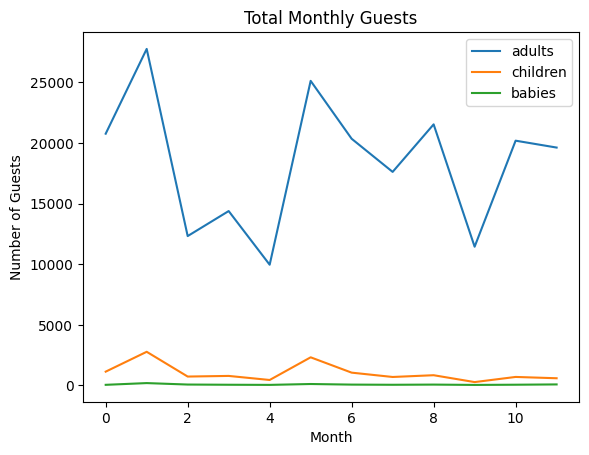

In [290]:
monthly_guests.plot(kind='line', xlabel='Month', ylabel='Number of Guests', title='Total Monthly Guests')

Here is the graph that we have created is showing the total guest for each month, having adults and children and babies are arriving.

Time for the next graph (exact same procedure)!

• A bar graph depicting the duration of guest stays

In [291]:
completedata_df['stay_duration'] = completedata_df['stays_in_week_nights'] + completedata_df['stays_in_weekend_nights'];

Here we are combining both stay_in week_nights, and stay_in_weekend nights column together and storing it in our newly created column stay_duration.

In [292]:
guest_duration = completedata_df.groupby('stay_duration')['stay_duration'].mean()

This line of code, we are grouping stay_duration, and calculating the average, so we get the average time against stays. The mean will be stored in the stay_duration column.

<Axes: title={'center': 'Total Duration of Guests Stays'}, xlabel='Duration', ylabel='Number of Guests'>

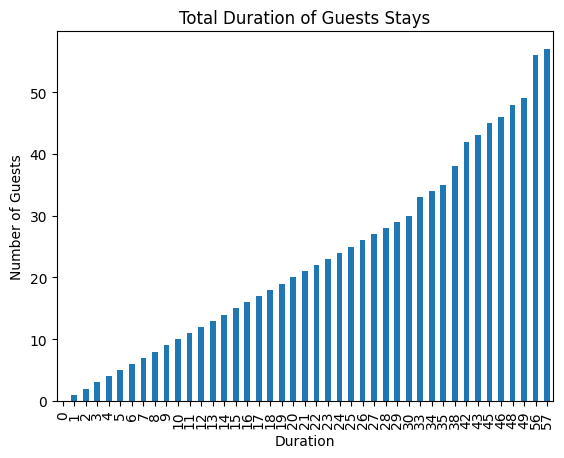

In [293]:
guest_duration.plot(kind='bar', xlabel='Duration', ylabel='Number of Guests', title='Total Duration of Guests Stays')

Finally, we are now plotting the graph for the guest_duration.

In [294]:
completedata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_month              118898 non-null  object 
 4   stays_in_weekend_nights         118898 non-null  int64  
 5   stays_in_week_nights            118898 non-null  int64  
 6   adults                          118898 non-null  int64  
 7   children                        118898 non-null  float64
 8   babies                          118898 non-null  int64  
 9   meal                            118898 non-null  object 
 10  country                         118898 non-null  object 
 11  market_segment                  118898 non-null  object 
 12  distribution_cha

I added this bit of code, just to see that the newly created column has been added to our data set.

Time for the next bit!

• A pie chart indicating guests' geographical origins.

In [295]:
geo_origins = completedata_df['country']

In [296]:
geo_origins = geo_origins.reset_index()

Here we are selecting the country column and storing all of its contents in geo_origins.

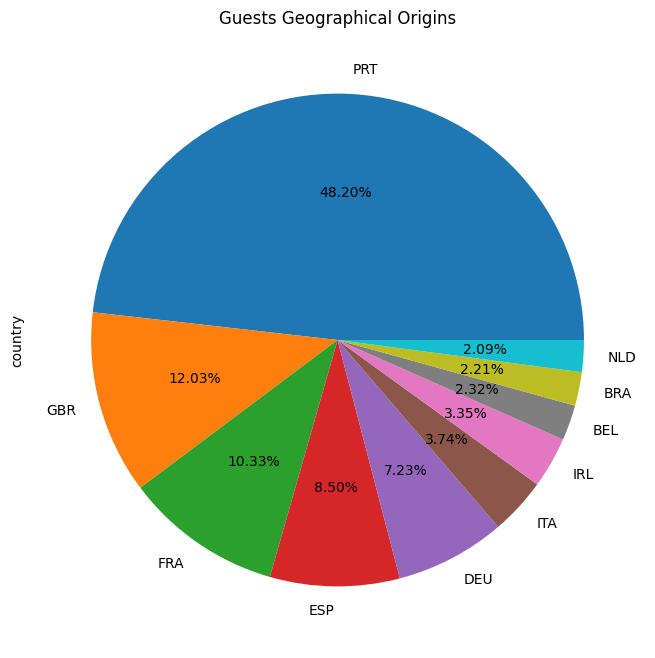

In [297]:
completedata_df['country'].value_counts().nlargest(10).plot(kind='pie', autopct='%.2f%%', title='Guests Geographical Origins', figsize=[12, 8]);

There is our pie chart, indicating guests origins.

# 3. Feature Engineering (25%):

•	Clearly explain any decisions to drop or convert features from one format to another.

In [298]:
completedata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_month              118898 non-null  object 
 4   stays_in_weekend_nights         118898 non-null  int64  
 5   stays_in_week_nights            118898 non-null  int64  
 6   adults                          118898 non-null  int64  
 7   children                        118898 non-null  float64
 8   babies                          118898 non-null  int64  
 9   meal                            118898 non-null  object 
 10  country                         118898 non-null  object 
 11  market_segment                  118898 non-null  object 
 12  distribution_cha

Let's just have a look at what columns we have again, and what data types are assigned to them.

In [299]:
completedata_df['arrival_date_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

So, in the arrival_date_month
column, we have multiple rows representing every month of the year.

We could, in fact use one hot encoding to break this down, and simplify the data subset.

In [300]:
completedata_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,stay_duration
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,0,0,C,3,No Deposit,Transient,0,0,0
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,0,0,0,C,4,No Deposit,Transient,0,0,0
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,0,0,A,0,No Deposit,Transient,0,0,1
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,0,0,A,0,No Deposit,Transient,0,0,1
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,0,0,A,0,No Deposit,Transient,0,1,2


This is the before we apply one hot encoding to the column.

In [301]:
month_dummies = pd.get_dummies(completedata_df['arrival_date_month'])

Here we are using the get_dummies built-in function from the pandas library which is used to one hot encode the category, and then we are retrieving the column that we want to encode from the data frame.

In [302]:
completedata_df = completedata_df.drop('arrival_date_month', axis=1)

Now that we have applied one hot encoding to our category, which now means the rows within the category are now their own columns. Now we need to drop arrival_dates.

In [303]:
completedata_df = completedata_df.join(month_dummies)

Let's join our new columns back to our original base frame.

Let's now apply this process to the other categorical features.

In [304]:
custype_dummies = pd.get_dummies(completedata_df['customer_type'])
completedata_df = completedata_df.drop('customer_type', axis=1)
completedata_df = completedata_df.join(custype_dummies)

In [305]:
hotel_dummies = pd.get_dummies(completedata_df['hotel'])
completedata_df = completedata_df.drop('hotel', axis=1)
completedata_df = completedata_df.join(hotel_dummies)

In [306]:
meal_dummies = pd.get_dummies(completedata_df['meal'])
completedata_df = completedata_df.drop('meal', axis=1)
completedata_df = completedata_df.join(meal_dummies)

In [307]:
country_dummies = pd.get_dummies(completedata_df['country'])
completedata_df = completedata_df.drop('country', axis=1)
completedata_df = completedata_df.join(country_dummies)

In [308]:
marketseg_dummies = pd.get_dummies(completedata_df['market_segment'])
completedata_df = completedata_df.drop('market_segment', axis=1)
completedata_df = completedata_df.join(marketseg_dummies)

In [309]:
completedata_df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,...,ZAF,ZMB,ZWE,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
0,0,342,0,0,2,0.0,0,Direct,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,737,0,0,2,0.0,0,Direct,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,7,0,1,1,0.0,0,Direct,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,13,0,1,1,0.0,0,Corporate,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,14,0,2,2,0.0,0,TA/TO,0,0,...,0,0,0,0,0,0,0,0,0,1


As shown, the ordinal feature has been broken down, and now our data looks cleaner.


•	Consider binning as a method to simplify certain features and reduce variability.

In [310]:
bins = [0, 10, 20, 30, 40, 50]

First, we need to create our bins which here we are creating 5 bins.

In [311]:
bin_labels = ['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50']

Now we need to give our 5 bins we ahve just created a label.

In [312]:
completedata_df['lead_time_bucket'] = pd.cut(completedata_df['lead_time'], bins=bins, labels=bin_labels)

Here we are creating a new column in our set called lead_time_bucket, and we are now putting its values into the bins that we have just created by using the cut method.

In [313]:
print(completedata_df['lead_time_bucket'].value_counts())

0 - 10     16283
10 - 20     8964
20 - 30     6843
30 - 40     6799
40 - 50     5290
Name: lead_time_bucket, dtype: int64


Now we get the unique rows from the newly created lead_time_bucket column to see if the values from lead_time have been been successfully.

# 4. Classifier Training (20%)

In [314]:
completedata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Columns: 225 entries, is_canceled to lead_time_bucket
dtypes: category(1), float64(1), int64(13), object(3), uint8(207)
memory usage: 43.9+ MB


In [315]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, Normalizer

Here we are importing the libraries necessary to build and train our model.

In [316]:
X = completedata_df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes', 'stay_duration', 'is_repeated_guest']]

These are the features that we will be training our model on.

In [317]:
y = completedata_df['is_canceled']

This is our target feature, so what we are trying to predict.

In [318]:
X_train_predict, X_test_predict, y_train_target, y_test_target = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

Here is when we actually split our data into test data and training data. In this case, 30% of our data will be used for testing and the remaining 70% will be data which we will use to train our model on. The reason why we have set our random states to 1 is to ensure that every time the data splits, it all splits equally, which essentially makes training easier for our model.

In [319]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=1)

We need to now create our decision tree.

In [320]:
decision_tree.fit(X_train_predict,y_train_target)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Now we are going to train our model on our data, and that's what the fit method allows us to do. We are saying that we are going to train our model on our predictive features (X_train_pred), and y_train_target contains what we are trying to predict.

In [321]:
original_prediction_result = decision_tree.predict(X_test_predict)

Now we are going to actually make the prediction on our predictive features, and we do that by using the predict method.

In [322]:
original_accuracy = accuracy_score(y_test_target, original_prediction_result)

We are now evaluating the accuracy of the decision tree's predictions on the test set.

Now, basically, we apply the same process to normalise the data and standardise the data.

In [323]:
normalised_X = Normalizer().fit(X_train_predict)
X_train_norm = normalised_X.transform(X_train_predict)
X_test_norm = normalised_X.transform(X_test_predict)

decision_tree.fit(X_train_norm, y_train_target)
normal_predict = decision_tree.predict(X_test_norm)
normalised_accuracy = accuracy_score(y_test_target, normal_predict)

Now we need to normalise the data, retrain the model and see if we get a higher accuracy. What this is doing is it is keeping the mean and common variance, but it is scaling the data (the values) to a range of 0 or 1.

In [324]:
standardised_X = StandardScaler().fit(X_train_predict)
X_train_std = standardised_X.transform(X_train_predict)
X_test_std = standardised_X.transform(X_test_predict)

decision_tree.fit(X_train_std, y_train_target)
stand_predict = decision_tree.predict(X_test_std)
standard_accuracy = accuracy_score(y_test_target, stand_predict)

Now that we have our normalised accuracy, as well as our original accuracy, now we need to standardise the data, retrain the model and see if we get a higher accuracy. which standardisation we are removing the so the data is all sent around zero and scaling the data to have a unit variance of one so now here all the features are on the same scale with the same variance. So it sort of makes things more equal in a sense.

In [325]:
print('Our Original Accuracy:', original_accuracy)
print('The Normalised Accuracy:', normalised_accuracy)
print('The Standardised Accuracy:', standard_accuracy)

Our Original Accuracy: 0.7765909728062798
The Normalised Accuracy: 0.775385477992711
The Standardised Accuracy: 0.7766190075693861


From the previous results on the explanations, we can now see which method improves the performance of our model, and here are the results.

In [326]:
print(classification_report(y_test_target, original_prediction_result, output_dict=False))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     22424
           1       0.72      0.64      0.68     13246

    accuracy                           0.78     35670
   macro avg       0.76      0.75      0.75     35670
weighted avg       0.77      0.78      0.77     35670



This is our classification report which shows us how our model has performed.

In the results, we can see that our models 78% overall accuracy with our prediction. We can see how many of the predicted positive were actually positive, how many the model successfully predicted, we can see how many samples were allocated for each class, and the averages across classes weighted by support.

So in conclusion, overall our model performed well.


# 5. Feature Importance: (10%)

In [327]:
importance = decision_tree.feature_importances_

During training our model, the model will have figured out what features contributed the most to our predictions and features that didn't really contribute that much. Essentially here we are extracting those features that both have contributed significantly and not contributed that much from our model for analysis.

In [328]:
for index, value in enumerate(importance):
  print('Feature: %-35s Importance: %-5s' % (X.columns[index], value))

Feature: lead_time                           Importance: 0.44607171688321734
Feature: stays_in_weekend_nights             Importance: 0.040523407948119095
Feature: stays_in_week_nights                Importance: 0.07110652140351663
Feature: adults                              Importance: 0.05230234318870555
Feature: children                            Importance: 0.027052363446115814
Feature: babies                              Importance: 0.002934139046828706
Feature: previous_cancellations              Importance: 0.06418446032089974
Feature: previous_bookings_not_canceled      Importance: 0.015682167268353402
Feature: required_car_parking_spaces         Importance: 0.043294519053277906
Feature: total_of_special_requests           Importance: 0.10845554927086497
Feature: booking_changes                     Importance: 0.047951272803339204
Feature: stay_duration                       Importance: 0.07820273389754391
Feature: is_repeated_guest                   Importance: 0.00223880546

With these results, we can see that lead_time has the highest importance of 0.42. previous_cancellations and total_special_requests high importance of 0.1 which they both contributed significantly to the predictions, and stay_duration and adults have a moderate importance between 0.05 and 0.07.

This results in the rest of the feature is not being useful for the models predictions.